<a href="https://colab.research.google.com/github/DarynaMir/GoIt_Data_Science/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import UnicodeDammit

# URL of the page containing the table
url = "https://uk.wikipedia.org/wiki/Населення_України"

response = requests.get(url)
response.encoding = UnicodeDammit(response.content).original_encoding

tables = pd.read_html(response.text, header=None)
table_13 = tables[12]

print("Table 13:")
print(table_13.head())

Table 13:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [ ]:
print("Shape of Table 13:", table_13.shape)

Shape of Table 13: (28, 9)


In [ ]:
table_13.replace("—", np.nan, inplace=True)

print("Table 13 after replacing '—' with NaN:")
print(table_13.head())

Table 13 after replacing '—' with NaN:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [ ]:
print(table_13.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [ ]:
for col in table_13.columns[1:]:
    table_13[col] = pd.to_numeric(table_13[col], errors='coerce')
print("Data types after conversion:")
print(table_13.dtypes)

Data types after conversion:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [ ]:
missing_values = table_13.isnull().sum() / len(table_13)
print("Proportion of missing values in each column:\n", missing_values)

Proportion of missing values in each column:
 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [ ]:
table_13 = table_13.iloc[:-1]
print("Remove the last row:\n", table_13)

Remove the last row:
                Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122.0   88.0
9            Київська  204.0  189.0  156.0   123    73   122  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108.0   68.0
11          Луганська  262.0  235.0  144.0   116    62    96   51.0    NaN
12 

In [ ]:
table_13.replace("—", np.nan, inplace=True)
for col in table_13.columns[1:]:
    table_13[col] = pd.to_numeric(table_13[col], errors='coerce')
numeric_cols = table_13.columns[1:]
table_13[numeric_cols] = table_13[numeric_cols].apply(lambda x: x.fillna(x.mean()))

print("Fill missing values with the column mean:\n", table_13)

Fill missing values with the column mean:
                Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська

<ipython-input-24-bb3f54835b90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_13.replace("—", np.nan, inplace=True)
<ipython-input-24-bb3f54835b90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_13[col] = pd.to_numeric(table_13[col], errors='coerce')
<ipython-input-24-bb3f54835b90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [ ]:
mean_birth_rate_2019 = table_13['2019'].mean()

# Get the list of regions where the birth rate in 2019 was higher than the average
regions_above_average_2019 = table_13[table_13['2019'] > mean_birth_rate_2019]['Регіон']
print("Regions with birth rate above average in 2019:\n", regions_above_average_2019)


Regions with birth rate above average in 2019:
 2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [ ]:
highest_birth_rate_2014 = table_13.loc[table_13['2014'].idxmax()]['Регіон']
print("Region with the highest birth rate in 2014:", highest_birth_rate_2014)

Region with the highest birth rate in 2014: Рівненська


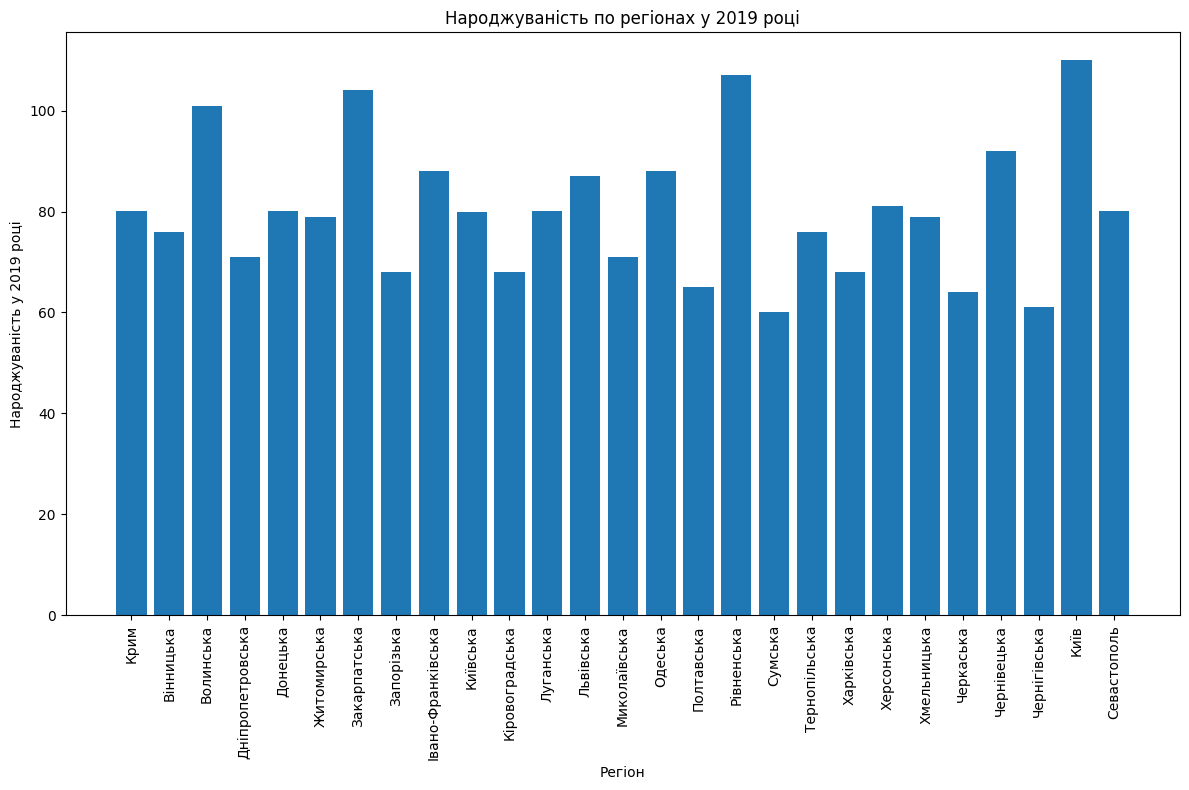

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(table_13['Регіон'], table_13['2019'])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність у 2019 році')
plt.title('Народжуваність по регіонах у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()